<a href="https://colab.research.google.com/github/isnteer-sluz/M259/blob/main/EDA_Football_teams_09_to_22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**DataSet einlesen**

Import Anweisungen

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re

.csv DataSet Laden

In [ ]:
df_train = pd.read_csv('https://gist.githubusercontent.com/isnteer-sluz/ece915d0d1a797e63ce3fa29d9c14c4a/raw/23344d36682bdb0f5d80e15bc9498f19b1617708/gistfile1.txt')

# Variablen Analysieren

- Mithilfe von `.describe()` und `.shape()` haben wir grundlegende Informationen über die Struktur und Verteilung der Daten in der Tabelle erhalten.
- Ein **Boxplot**-Diagramm der Spalte **Rank** hat einen Fehler aufgedeckt: Es existiert ein Rang 323, obwohl der maximale Rang in der Tabelle nur 32 betragen sollte.
- Ausserdem haben wir festgestellt, dass einige Mannschaften weniger Spiele als andere absolviert haben. Dies kann daran liegen, dass es zu Spielausfällen gekommen ist.

In [ ]:
df_train.describe()

,Rank,Games,Wins,Draws,Losses,Points,GoalsFor,GoalsAgainst,GoalDifference,Goals,...,Nutmegs,Controlled,DistMovedWithBall,ProgressiveDistMoved,ProgC,ProgressiveIntoFinalThird,ProgressiveInto18Yard,Miscontrols,MiscontrolsAfterTackle,ProgressivePassReceived
count,1688.000000,1272.000000,1272.000000,1272.000000,1272.000000,1272.000000,1272.000000,1272.000000,1272.00000,1690.000000,...,490.000000,490.000000,490.000000,490.000000,490.000000,490.000000,490.000000,490.000000,490.000000,490.000000
mean,13.212085,37.105346,13.860849,9.390723,13.853774,50.938679,50.680818,50.660377,0.02044,40.983432,...,0.634735,387.399388,1998.687755,1078.070408,42.133265,12.833490,3.788367,12.558796,11.431082,37.093265
std,11.652804,1.936824,5.839471,2.944652,5.338193,16.656978,16.698945,12.701106,25.64368,22.574074,...,0.241344,82.678298,410.154133,244.932767,11.668808,3.202049,1.304016,1.254332,1.346927,8.074744
min,1.000000,27.000000,2.000000,2.000000,0.000000,13.000000,20.000000,17.000000,-61.00000,0.000000,...,0.110000,212.200000,1050.300000,537.500000,21.900000,6.790000,1.530000,8.390000,8.660000,18.100000
25%,6.000000,38.000000,10.000000,7.000000,10.000000,40.000000,39.000000,42.000000,-17.00000,27.000000,...,0.470000,329.925000,1717.275000,912.625000,34.325000,10.400000,2.767500,11.700000,10.400000,31.100000
50%,12.000000,38.000000,12.000000,9.000000,14.000000,47.000000,47.000000,51.000000,-4.00000,42.000000,...,0.610000,371.050000,1944.300000,1047.150000,40.200000,12.400000,3.545000,12.600000,11.400000,36.750000
75%,17.000000,38.000000,17.000000,11.000000,18.000000,61.000000,59.000000,59.000000,14.00000,54.000000,...,0.790000,431.850000,2244.800000,1226.625000,48.100000,14.475000,4.625000,13.400000,12.300000,41.600000
max,323.000000,38.000000,33.000000,19.000000,29.000000,102.000000,121.000000,94.000000,89.00000,121.000000,...,1.840000,636.900000,3322.100000,1920.300000,87.800000,25.700000,9.970000,15.900000,15.300000,67.200000


In [ ]:
df_train.shape

(1690, 93)

In [ ]:
df_train.isnull().sum()

,0
Key,0
Team,0
League,0
Season,0
Rank,2
...,...
ProgressiveIntoFinalThird,1200
ProgressiveInto18Yard,1200
Miscontrols,1200
MiscontrolsAfterTackle,1200


<Axes: >

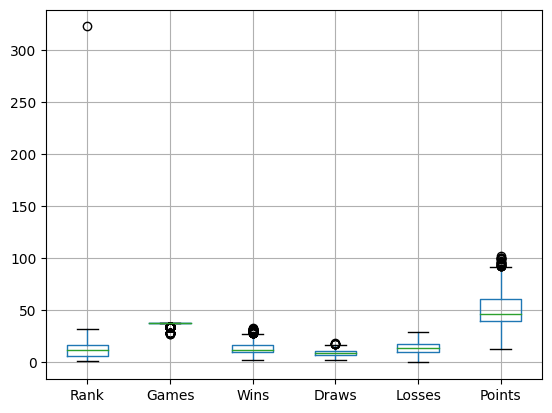

In [ ]:
# Boxplot
df_train[['Rank', 'Games', 'Wins', 'Draws', 'Losses', 'Points']].boxplot()

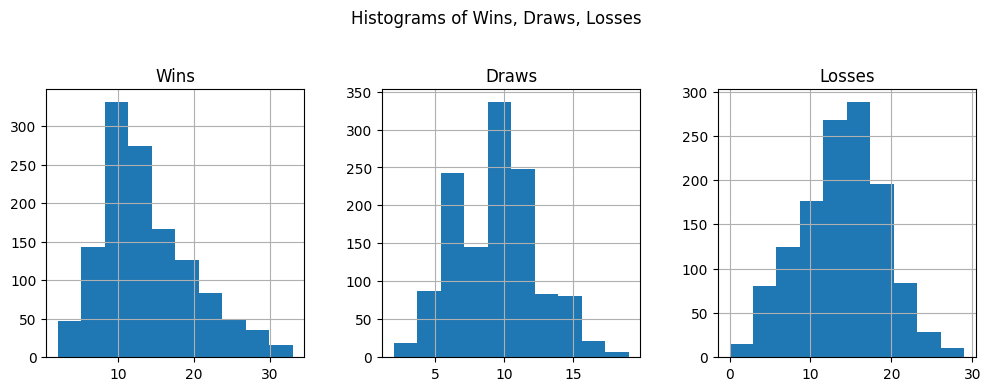

In [ ]:
# Histograms
df_train[['Wins', 'Draws', 'Losses']].hist(figsize=(12, 8), bins=10, layout=(2, 3))
plt.suptitle("Histograms of Wins, Draws, Losses")
plt.show()

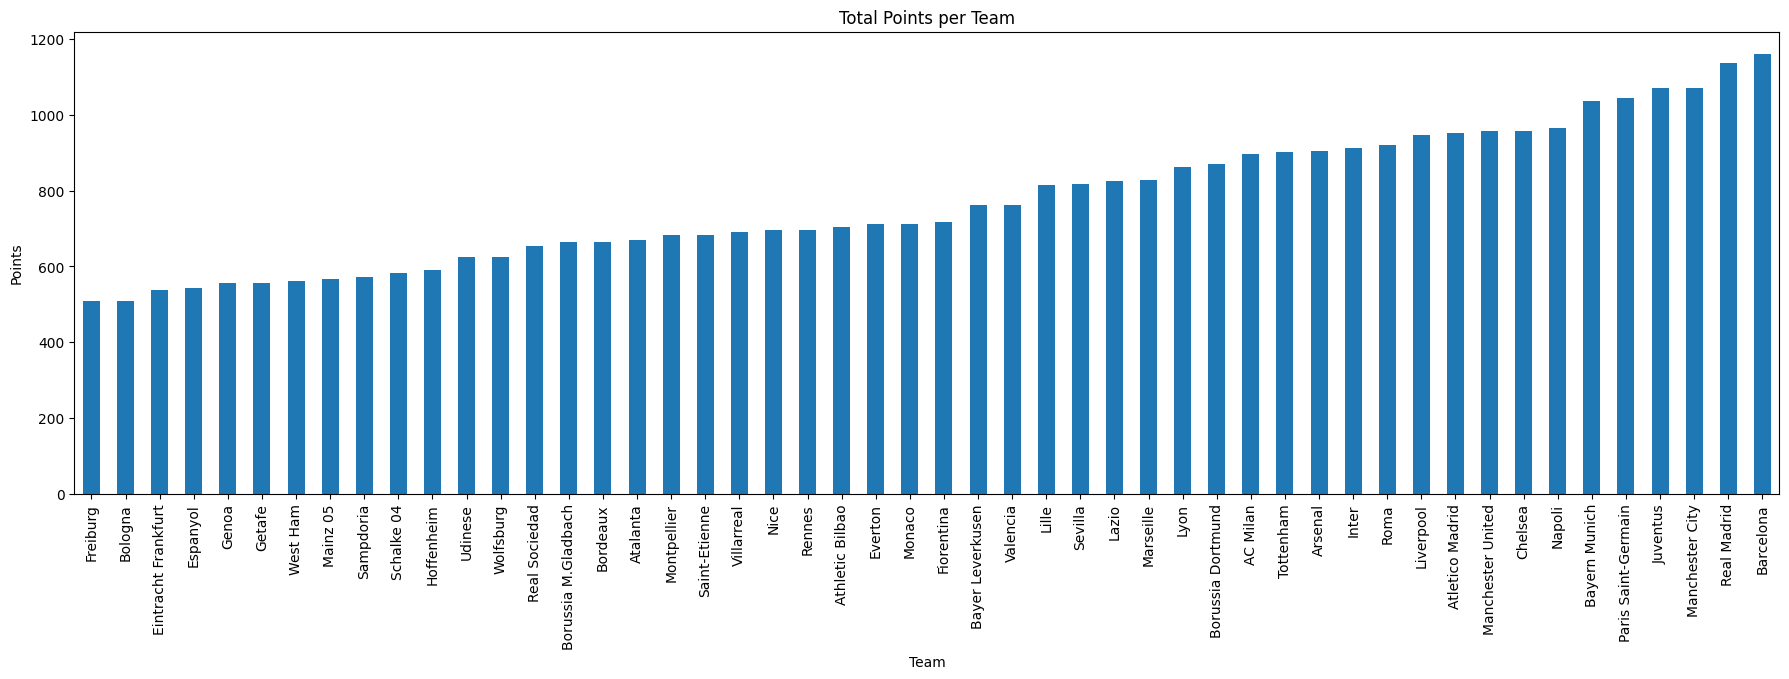

In [ ]:
# Barchart
plt.figure(figsize=(22, 6))
df_train.groupby('Team')['Points'].sum().sort_values().tail(50).plot(kind='bar')
plt.title("Total Points per Team")
plt.ylabel("Points")
plt.xticks(rotation=90)
plt.show()

# Gruppierungen analysieren

- Wir haben untersucht, ob im Laufe der Zeit mehr Tore pro Saison erzielt werden.

In [ ]:
# Anzahl Total Tore/Saison von allen Teams
df_train.groupby("Season")["Goals"].sum()

,Goals
Season,
2009/2010,5180
2010/2011,5213
2011/2012,5267
2012/2013,5372
2013/2014,5374
2014/2015,5163
2015/2016,5215
2016/2017,5553
2017/2018,5348


- Hier haben wir noch die durchschnittlichen Tore pro Saison ausgerechnet. Von den ersten 10.

In [ ]:
df_top10 = df_train.sort_values(by='Rank', ascending=True).head(10)
df_top10.groupby("Season")["Goals"].mean()

,Goals
Season,
2009/2010,103.000000
2010/2011,67.000000
2011/2012,80.000000
2012/2013,105.500000
2013/2014,90.333333
2014/2015,110.000000
2016/2017,36.000000


# Korrelation von Variablen feststellen

Mithilfe der Berechnung von Korrelationen konnten wir folgende Erkenntnisse gewinnen:

- **Korrelation zwischen "GoalsFor" und "Rank"**:  
  Die Korrelation beträgt **-0.993**, was auf eine **starke negative Korrelation** hinweist. Dies unterstützt die Hypothese, dass je mehr Tore ein Team erzielt, desto besser (niedriger) ist seine Platzierung im Ranking.

- **Korrelation zwischen "Wins" und "Rank"**:  
  Die Korrelation beträgt **-0.996**, was ebenfalls eine **sehr starke negative Korrelation** darstellt. Je mehr Siege ein Team hat, desto niedriger (besser) ist der Rang. Auch diese Beobachtung stützt die Hypothese.

- **Korrelation zwischen "Losses" und "Rank"**:  
  Die Korrelation beträgt **0.996**, was auf eine **starke positive Korrelation** hinweist. Dies bedeutet, dass je mehr Niederlagen ein Team hat, desto schlechter (höher) ist sein Rang, was die Hypothese bestätigt.

In [ ]:
# 1. Je höher die Toranzahl, je tiefer der Rank
correlation1 = df_train['GoalsFor'].corr(df_train['Rank'])
print(correlation1)
# 2. Je höher die Wins, je tiefer der Rank
correlation2 = df_train['Wins'].corr(df_train['Rank'])
print(correlation2)
# 3. Je höher die Losses, je höher der Rank
correlation3 = df_train['Losses'].corr(df_train['Rank'])
print(correlation3)

-0.7868071151133105
-0.9062533060131781
0.8969605579200953


# Hypothesen aufstellen

Basierend auf den Korrelationen haben wir folgende Hypothesen aufgestellt:

1. Je mehr Tore ein Team erzielt, desto besser ist seine Platzierung im Ranking.
2. Je mehr Siege ein Team hat, desto besser ist seine Platzierung im Ranking.
3. Je mehr Niederlagen ein Team hat, desto schlechter ist seine Platzierung im Ranking.

# Hypothesen bearbeiten

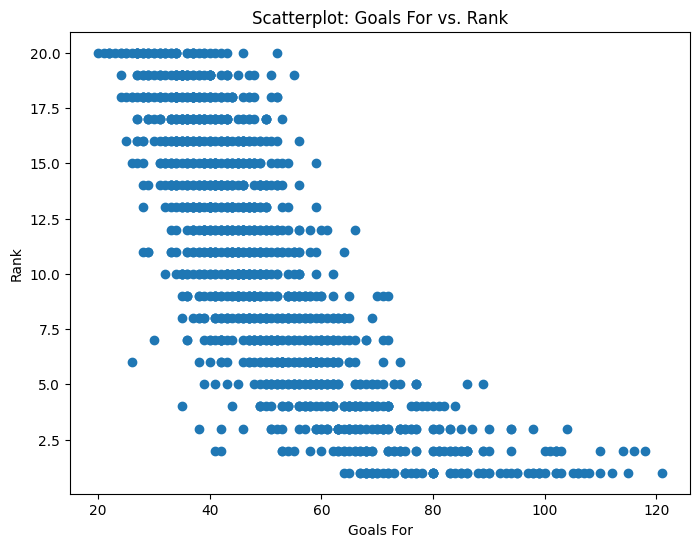

In [ ]:
# Scatterplot | Je höher die Toranzahl, je tiefer der Rank
plt.figure(figsize=(8,6))
plt.scatter(df_train['GoalsFor'], df_train['Rank'])
plt.title('Scatterplot: Goals For vs. Rank')
plt.xlabel('Goals For')
plt.ylabel('Rank')
plt.show()